In [1]:
# importing librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

In [2]:
nvda_short_data = yf.download("NVDA", period="1mo", interval="2m")

[*********************100%***********************]  1 of 1 completed


In [3]:
nvda_short_data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
Datetime,,,,,,
2024-12-16 14:30:00+00:00,133.051300,133.051300,134.399994,132.940002,134.164993,12380116
2024-12-16 14:32:00+00:00,132.440002,132.440002,133.528702,132.320007,133.000000,3747872
2024-12-16 14:34:00+00:00,131.750000,131.750000,133.350006,131.580002,132.425003,4592230
2024-12-16 14:36:00+00:00,131.120102,131.120102,132.250000,131.009995,131.764999,4056608
2024-12-16 14:38:00+00:00,131.110001,131.110001,131.160004,130.449997,131.125000,4874053


In [4]:
nvda_short_data.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
Datetime,,,,,,
2025-01-15 16:36:00+00:00,133.909103,133.909103,134.039993,133.811096,133.899994,713985
2025-01-15 16:38:00+00:00,134.140106,134.140106,134.149994,133.905197,133.909195,585598
2025-01-15 16:40:00+00:00,134.160995,134.160995,134.270004,134.119995,134.139999,541776
2025-01-15 16:42:00+00:00,133.849899,133.849899,134.160004,133.820007,134.160004,514988
2025-01-15 16:44:00+00:00,133.735992,133.735992,133.735992,133.735992,133.735992,0


In [5]:
nvda_short_data.shape

(3683, 6)

In [6]:
nvda_short_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3683 entries, 2024-12-16 14:30:00+00:00 to 2025-01-15 16:44:00+00:00
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, NVDA)  3683 non-null   float64
 1   (Close, NVDA)      3683 non-null   float64
 2   (High, NVDA)       3683 non-null   float64
 3   (Low, NVDA)        3683 non-null   float64
 4   (Open, NVDA)       3683 non-null   float64
 5   (Volume, NVDA)     3683 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 201.4 KB


In [7]:
# check for the missing values
nvda_short_data.isnull().sum()

,,0
Price,Ticker,
Adj Close,NVDA,0
Close,NVDA,0
High,NVDA,0
Low,NVDA,0
Open,NVDA,0
Volume,NVDA,0


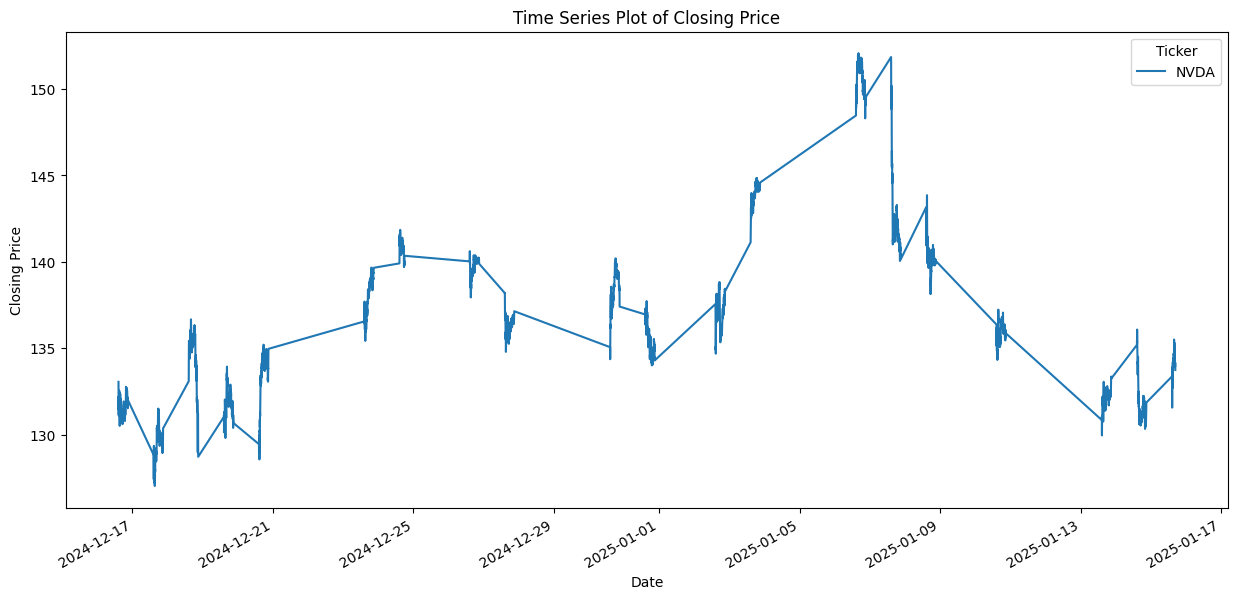

In [8]:
# time series plot
nvda_short_data['Close'].plot(figsize=(15,7))
plt.title('Time Series Plot of Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

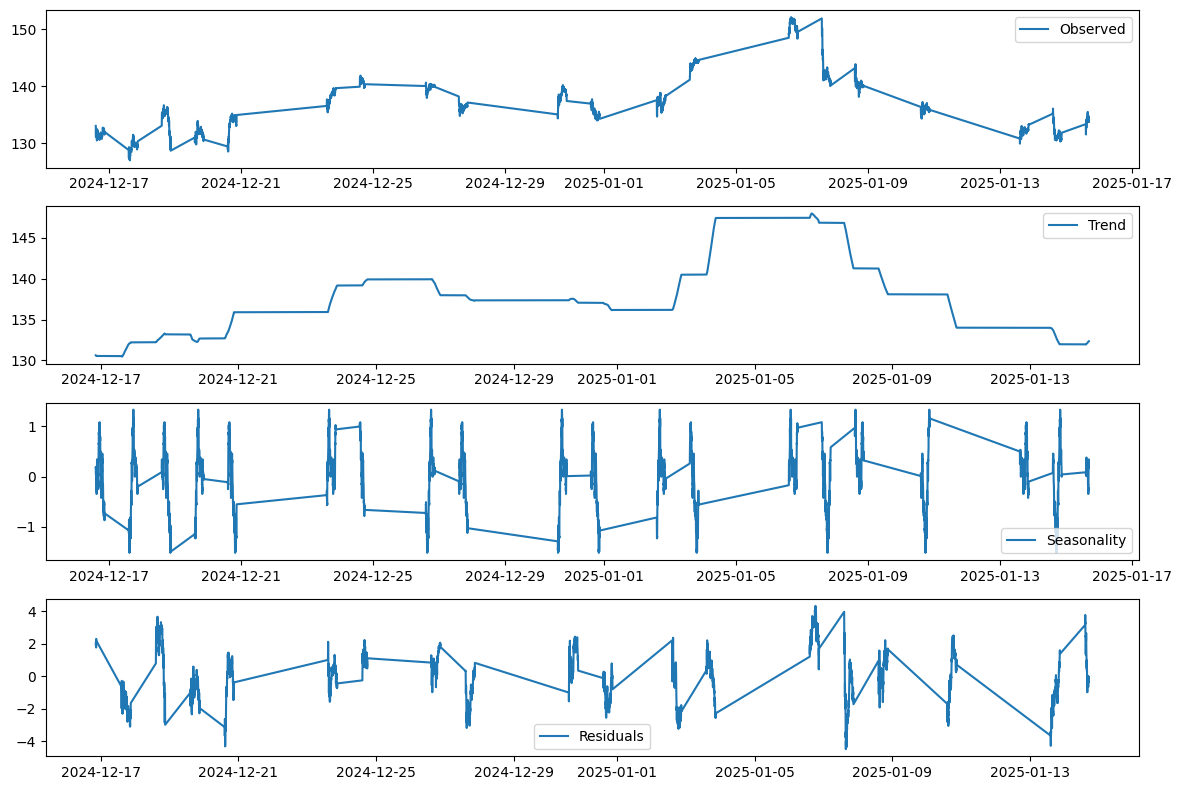

In [9]:
# Decompose the time series into trend, seasonality, and residual
decomposition = seasonal_decompose(nvda_short_data['Close'], model='additive', period=365)

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

<Figure size 1000x500 with 0 Axes>

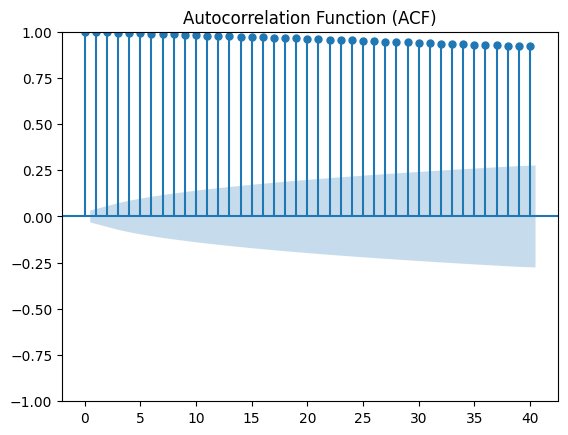

In [10]:
plt.figure(figsize=(10, 5))
plot_acf(nvda_short_data['Close'], lags=40)
plt.title('Autocorrelation Function (ACF)')
plt.show()

<Figure size 1000x500 with 0 Axes>

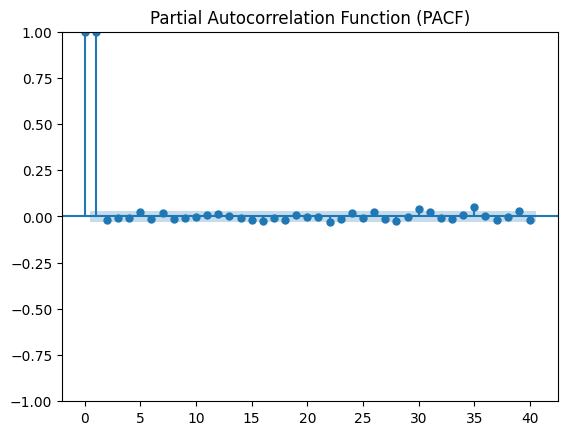

In [11]:
plt.figure(figsize=(10, 5))
plot_pacf(nvda_short_data['Close'], lags=40)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [12]:
# get the Date out of the index
nvda_short_data.reset_index(inplace=True)

In [13]:
nvda_short_data

Price,Datetime,Adj Close,Close,High,Low,Open,Volume
Ticker,,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
0,2024-12-16 14:30:00+00:00,133.051300,133.051300,134.399994,132.940002,134.164993,12380116
1,2024-12-16 14:32:00+00:00,132.440002,132.440002,133.528702,132.320007,133.000000,3747872
2,2024-12-16 14:34:00+00:00,131.750000,131.750000,133.350006,131.580002,132.425003,4592230
3,2024-12-16 14:36:00+00:00,131.120102,131.120102,132.250000,131.009995,131.764999,4056608
4,2024-12-16 14:38:00+00:00,131.110001,131.110001,131.160004,130.449997,131.125000,4874053
...,...,...,...,...,...,...,...
3678,2025-01-15 16:36:00+00:00,133.909103,133.909103,134.039993,133.811096,133.899994,713985
3679,2025-01-15 16:38:00+00:00,134.140106,134.140106,134.149994,133.905197,133.909195,585598
3680,2025-01-15 16:40:00+00:00,134.160995,134.160995,134.270004,134.119995,134.139999,541776


In [14]:
# isolet the Date and Sales columns
nvda_short_data = nvda_short_data[['Datetime', 'Close']]

In [15]:
nvda_short_data

Price,Datetime,Close
Ticker,,NVDA
0,2024-12-16 14:30:00+00:00,133.051300
1,2024-12-16 14:32:00+00:00,132.440002
2,2024-12-16 14:34:00+00:00,131.750000
3,2024-12-16 14:36:00+00:00,131.120102
4,2024-12-16 14:38:00+00:00,131.110001
...,...,...
3678,2025-01-15 16:36:00+00:00,133.909103
3679,2025-01-15 16:38:00+00:00,134.140106
3680,2025-01-15 16:40:00+00:00,134.160995


In [16]:
# Split into training and testing sets based on index
train_size = int(len(nvda_short_data) * 0.8)  # 80% for training
train_data = nvda_short_data[:train_size]
test_data = nvda_short_data[train_size:]

In [17]:
# set the date coumn as index
train_data.set_index('Datetime', inplace=True)
test_data.set_index('Datetime', inplace=True)

In [18]:
train_data

Price,Close
Ticker,NVDA
Datetime,
2024-12-16 14:30:00+00:00,133.051300
2024-12-16 14:32:00+00:00,132.440002
2024-12-16 14:34:00+00:00,131.750000
2024-12-16 14:36:00+00:00,131.120102
2024-12-16 14:38:00+00:00,131.110001
...,...
2025-01-08 18:02:00+00:00,139.820007
2025-01-08 18:04:00+00:00,139.750000


In [19]:
# look at train data date range
train_data.index.min(), train_data.index.max()

(Timestamp('2024-12-16 14:30:00+0000', tz='UTC'),
 Timestamp('2025-01-08 18:10:00+0000', tz='UTC'))

In [20]:
# look at the test data date range
test_data.index.min(), test_data.index.max()

(Timestamp('2025-01-08 18:12:00+0000', tz='UTC'),
 Timestamp('2025-01-15 16:44:00+0000', tz='UTC'))

In [21]:
scaler = MinMaxScaler()

train_data.loc[:, 'x'] = scaler.fit_transform(train_data[['Close']])
test_data.loc[:, 'x'] = scaler.transform(test_data[['Close']])

In [22]:
# Create sequences for the LSTM model
sequence_length = 100
train_sequences = []
test_sequences = []

for i in range(len(train_data) - sequence_length):
    train_sequences.append(train_data['x'].iloc[i:i+sequence_length].values)

for i in range(len(test_data) - sequence_length):
    test_sequences.append(test_data['x'].iloc[i:i+sequence_length].values)

train_sequences = np.array(train_sequences)
test_sequences = np.array(test_sequences)

In [23]:
# Prepare train and test targets
train_targets = train_data['x'].iloc[sequence_length:].values
test_targets = test_data['x'].iloc[sequence_length:].values

In [24]:
import time
start_time = time.time()

# Create and train an LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_sequences.reshape(-1, sequence_length, 1), train_targets,
epochs=5, batch_size=32)

# Make predictions
test_predictions = model.predict(
                   test_sequences.reshape(-1, sequence_length, 1))

print(time.time() - start_time)

# Inverse transform the predictions to the original scale
test_predictions = scaler.inverse_transform(test_predictions).flatten()
test_targets = scaler.inverse_transform(test_targets.reshape(-1, 1))

Epoch 1/5
89/89 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0764
Epoch 2/5
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 6.9651e-04
Epoch 3/5
89/89 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 6.2566e-04
Epoch 4/5
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 4.9659e-04
Epoch 5/5
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 4.6904e-04
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
27.553426265716553


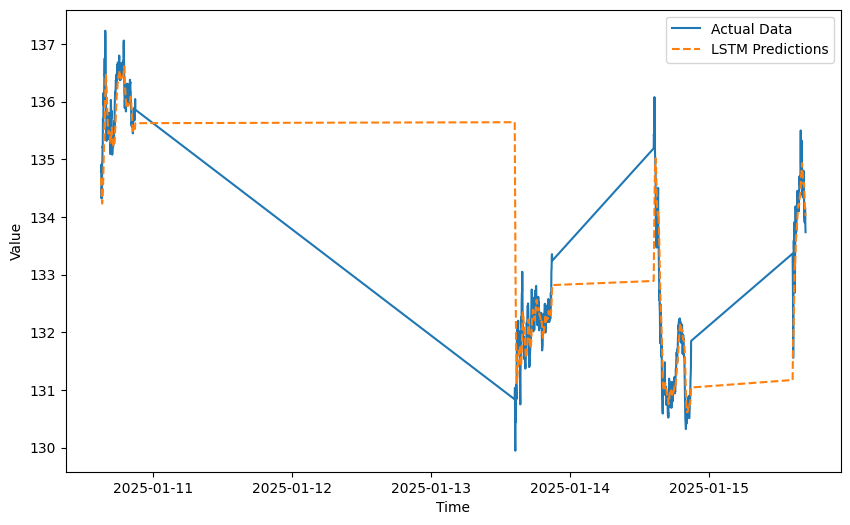

In [25]:
# Plot the original data and LSTM predictions
plt.figure(figsize=(10, 6))
plt.plot(test_data.index[sequence_length:], test_targets,
label="Actual Data", linestyle='-')
plt.plot(test_data.index[sequence_length:], test_predictions,
label="LSTM Predictions", linestyle='--')
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(False)
plt.show()

In [26]:
# measure of prediction accuracy
test_predictions_df = pd.DataFrame(test_predictions, columns = ["LSTM"])
test_targets_df = pd.DataFrame(test_targets, columns = ["actuals"])
predictions = pd.concat([test_predictions_df, test_targets_df], axis=1)

wape = (predictions['actuals'] - predictions['LSTM']).abs().sum() / predictions['actuals'].sum()

print(wape * 100)

0.26203310452819095


In [27]:
# predict for the next one year
last_sequence = test_sequences[-1]
predicted_values = []

for _ in range(365):
    predicted_value = model.predict(last_sequence.reshape(1, sequence_length, 1))
    predicted_values.append(predicted_value[0, 0])
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = predicted_value

predicted_values = scaler.inverse_transform(np.array(predicted_values).reshape(-1, 1)).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━

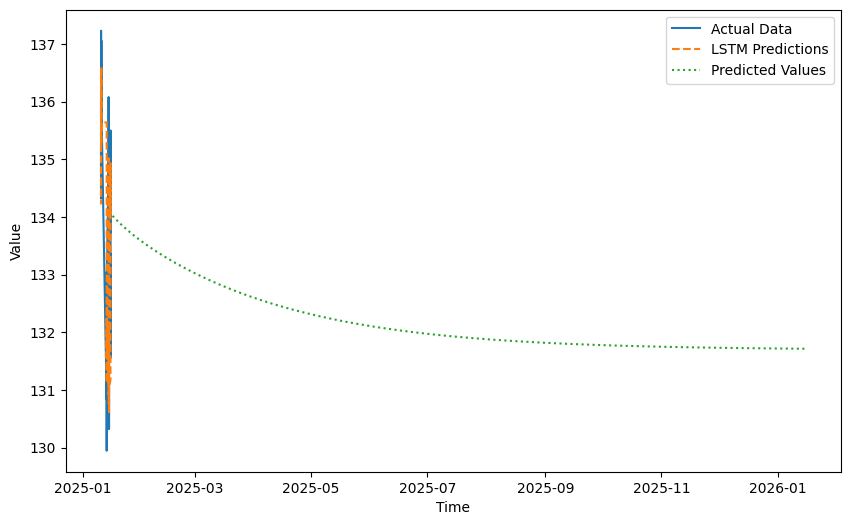

In [28]:
# show in plot
plt.figure(figsize=(10, 6))
plt.plot(test_data.index[sequence_length:], test_targets,
label="Actual Data", linestyle='-')
plt.plot(test_data.index[sequence_length:], test_predictions,
label="LSTM Predictions", linestyle='--')

# Generate a date range for the predicted values
# Assuming your test_data has a daily frequency
from pandas.tseries.offsets import DateOffset
future_dates = pd.date_range(start=test_data.index[-1], periods=365 + 1, freq='D')[1:]  # Exclude the start date

# Now plot the predicted values against the future dates
plt.plot(future_dates, predicted_values,
         label="Predicted Values", linestyle=':')

plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(False)
plt.show()